In [29]:
#Capture a video
import cv2

cap = cv2.VideoCapture(0)
w=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH ))
h=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT ))
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter('video.avi',fourcc, 20.0, (w,h))

while(True):
    ret, frame = cap.read()
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    try:
        out.write(frame)
    except:
        print('ERROR - Not writting to file') 
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('p'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

In [31]:
# Framing video into images
import numpy as np
import os

# Playing video from file:
cap = cv2.VideoCapture('video.avi')

try:
    if not os.path.exists('data1'):
        os.makedirs('data1')
except OSError:
    print ('Error: Creating directory of data')

currentFrame = 0
nameCount = 0
while(currentFrame < 200): 
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Saves image of the current frame in jpg file
    name = './data1/frame' + str(nameCount) + '.jpg'
#     print ('Creating...' + name)
    cv2.imwrite(name, frame)
    nameCount +=1
    # To stop duplicate images
    currentFrame += 2
print ('Dataset Ready!')
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

Creating..../data1/frame0.jpg
Creating..../data1/frame1.jpg
Creating..../data1/frame2.jpg
Creating..../data1/frame3.jpg
Creating..../data1/frame4.jpg
Creating..../data1/frame5.jpg
Creating..../data1/frame6.jpg
Creating..../data1/frame7.jpg
Creating..../data1/frame8.jpg
Creating..../data1/frame9.jpg
Creating..../data1/frame10.jpg
Creating..../data1/frame11.jpg
Creating..../data1/frame12.jpg
Creating..../data1/frame13.jpg
Creating..../data1/frame14.jpg
Creating..../data1/frame15.jpg
Creating..../data1/frame16.jpg
Creating..../data1/frame17.jpg
Creating..../data1/frame18.jpg
Creating..../data1/frame19.jpg
Creating..../data1/frame20.jpg
Creating..../data1/frame21.jpg
Creating..../data1/frame22.jpg
Creating..../data1/frame23.jpg
Creating..../data1/frame24.jpg
Creating..../data1/frame25.jpg
Creating..../data1/frame26.jpg
Creating..../data1/frame27.jpg
Creating..../data1/frame28.jpg
Creating..../data1/frame29.jpg
Creating..../data1/frame30.jpg
Creating..../data1/frame31.jpg
Creating..../data1

In [1]:
from imgaug import augmenters as iaa
from imgaug import parameters as iap

import matplotlib.image as mpimg
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
images = np.array([mpimg.imread("data1/frame{}.jpg".format(i)) for i in range(100)], dtype = np.uint8)
images.shape

(100, 720, 1280, 3)

In [53]:
seq = iaa.Sequential([
    iaa.Fliplr(0.2), # horizontal flips
    
    # Small gaussian blur with random sigma between 0 and 0.5.
    iaa.Sometimes(0.8,
        iaa.GaussianBlur(sigma=(0, 0.5))
        
    ),
    iaa.Sometimes(0.7,
         iaa.Sharpen(alpha=(0.0, 1.0), lightness=(0.75, 2.0))
    ),
    
    # Strengthen or weaken the contrast in each image.
    iaa.ContrastNormalization((0.5, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.1),
    
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Sometimes(0.5,
        iaa.Affine(
            translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
            rotate=(-10, 10),
        )
     )
], random_order=True) # apply augmenters in random order

images_aug = seq.augment_images(images)

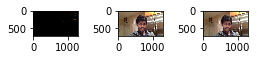

In [54]:
for i in range(3):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i])
    plt.tight_layout()

plt.show()

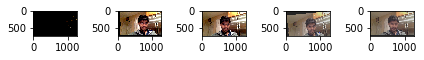

In [55]:
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images_aug[i])
    plt.tight_layout()

plt.show()

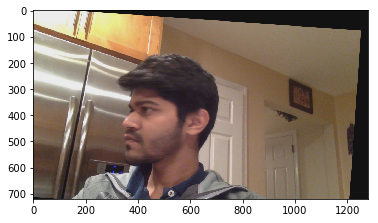

In [63]:
plt.imshow(images_aug[59])